<a href="https://colab.research.google.com/github/indrasn0wal/MLDLS2022/blob/main/Assignment_2_%26_3(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Classification


```
In this dataset we are given a dataset consisting the height, weight and Body Mass Index and we have to classify(or predict) the gender of them.
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded the file named "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GenderPredict.csv to GenderPredict.csv
User uploaded the file named "GenderPredict.csv" with length 8318 bytes


In [3]:
df= pd.read_csv('GenderPredict.csv')

In [4]:
print(df.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [5]:
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

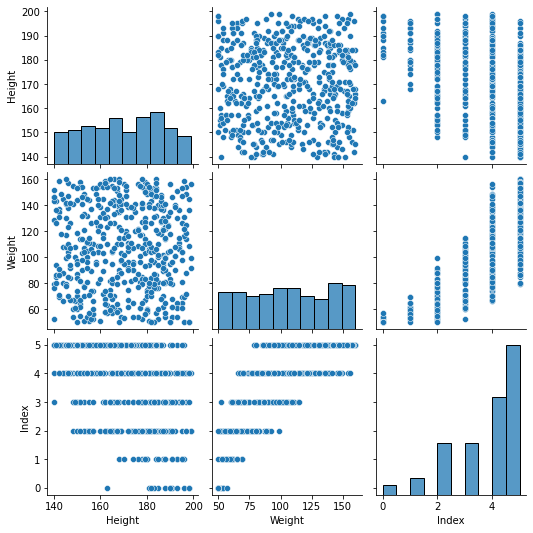

In [6]:
sns.pairplot(df)

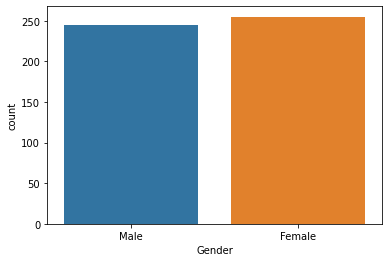

In [7]:
sns.countplot(x = 'Gender', data = df)

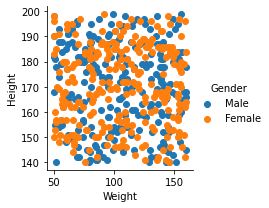

In [8]:
sns.FacetGrid(df,hue="Gender").map(plt.scatter, "Weight","Height").add_legend()

In [9]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [10]:
gender_mapping={'Male':0,'Female':1}
df["Gender"]=df["Gender"].map(gender_mapping)

In [11]:
print(df.head())

   Gender  Height  Weight  Index
0       0     174      96      4
1       0     189      87      2
2       1     185     110      4
3       1     195     104      3
4       0     149      61      3


In [31]:
X=df[["Height","Weight","Index"]].values
y=df[["Gender"]].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)

**Implementing Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [36]:
model.score(X_test,y_test)

0.46

In [37]:
predict = model.predict(X_test)
predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [38]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        45
           1       0.51      0.40      0.45        55

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.46      0.46       100



In [42]:
print(metrics.confusion_matrix(y_test,predict))

[[24 21]
 [33 22]]


**Implementing Decision Tree**

In [44]:
from sklearn import tree

In [45]:
decision= tree.DecisionTreeClassifier()

In [46]:
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
decision.score(X_test,y_test)

0.5

In [49]:
predicted = model.predict(X_test)

In [50]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        45
           1       0.51      0.40      0.45        55

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.46      0.46       100



In [51]:
print(metrics.confusion_matrix(y_test,predict))

[[24 21]
 [33 22]]
